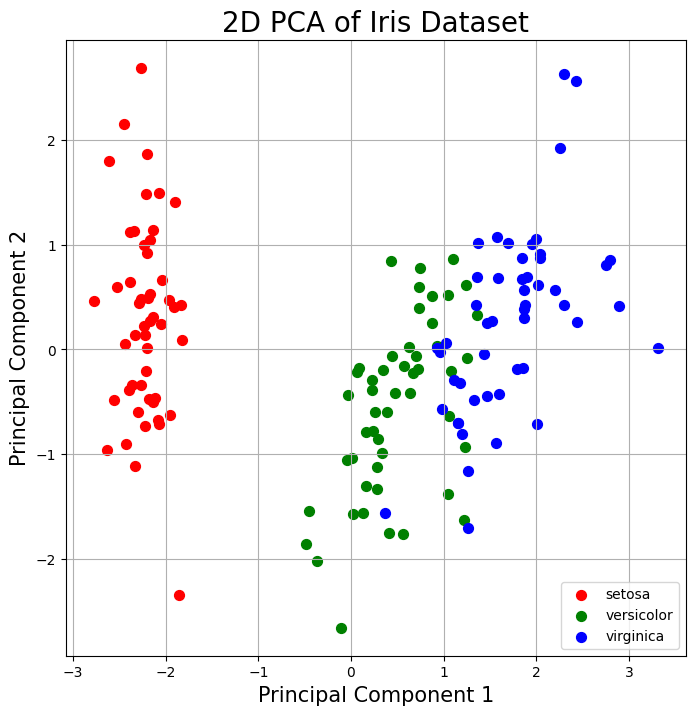

In [1]:
# Step 1: Load the Iris dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Step 2: Standardize the features
from sklearn.preprocessing import StandardScaler

features = iris.feature_names
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Step 3: Apply PCA to reduce to 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
principalDf['species'] = df['species']

# Step 4: Visualize the PCA result
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D PCA of Iris Dataset', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
target_names = iris.target_names

for target, color in zip(targets, colors):
    indicesToKeep = principalDf['species'] == target
    ax.scatter(
        principalDf.loc[indicesToKeep, 'Principal Component 1'],
        principalDf.loc[indicesToKeep, 'Principal Component 2'],
        c=color,
        s=50
    )

ax.legend(target_names)
ax.grid()
plt.show()